SURPRISE HOUSING
1. Read the data
2. Clean the data
3. Feature engineering
4. Feature Derivation 
5. EDA
6. Create Dummies 
7. Model Building
8. Model Evaluation

READING THE DATA

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

#filter warnings 
import warnings
warnings.filterwarnings('ignore')

#display max
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#scaling

In [2]:
#read the data 
data = pd.read_csv('train.csv')

In [3]:
#peep into the data
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#get more info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#check shape
data.shape

(1460, 81)

In [6]:
#analyze the data further
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


CHECK NULL VALUES

In [7]:
#check % null values 
round(data.isnull().sum()/len(data.index)*100, 2).sort_values(ascending=False)
#now lets impute NaN in PoolQC, MiscFeature, Alley, Fence and FireplaceQu with required strings

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

DATA ENGINEERING

In [8]:
#drop all features with more than 80% misssing values 
#if we dont do this our data will be biased 
feature_with_na = [feature for feature in data.columns if data[feature].isnull().sum() > 1168]
feature_with_na

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [9]:
#treatment of 'NA' in 'FireplaceQu' with 'No Fireplace'
data['FireplaceQu'] = data['FireplaceQu'].fillna('No Fireplace')
data['FireplaceQu'].isnull().sum()

0

In [10]:
#finally lets deal with NaN in 'LotFrontage'
#impute with median
data["LotFrontage"].replace(np.nan, data["LotFrontage"].median(), inplace=True)
data["LotFrontage"].isnull().sum()

0

In [11]:
#deal with missing values in GarageType, GarageFinish, GarageQual, GarageCond
gar_null = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for garage in gar_null:
    data[garage] = data[garage].fillna('No Garage')

data[gar_null].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [12]:
#deal with missing values in 'GarageYrBlt'
#lets impute it with 2020 so when we calculate garage age it shows up as 0
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(2020)
data['GarageYrBlt'].isnull().sum()

0

In [13]:
#Lets deal with null values in BsmtExposure, BsmtFinType2, BsmtFinType1, BsmtCond, BsmtQual
#ss per data description NaN = No Basement
bsmtcols = ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
for bsmt in bsmtcols:
    data[bsmt] = data[bsmt].fillna('No Basement')
data[bsmtcols].isnull().sum()

BsmtExposure    0
BsmtFinType2    0
BsmtFinType1    0
BsmtCond        0
BsmtQual        0
dtype: int64

In [14]:
#deal with missing values in 'MasVnrType'
# as per data description NaN = 'None'
data['MasVnrType'] = data['MasVnrType'].fillna('None')
data['MasVnrType'].isnull().sum()

0

In [15]:
#deal with missing values in 'MasVnrArea'
# as per data description NaN = 0
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
data['MasVnrArea'].isnull().sum()

0

In [16]:
#lets deal with null values in 'Electrical'
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [17]:
#lets replace NaN with 'SBrkr' (mode) in 'Electrical'
data['Electrical'] = data['Electrical'].fillna('SBrkr')
data['Electrical'].isnull().sum()

0

In [18]:
#final check on null values
round(data.isnull().sum()/len(data.index)*100, 2).sort_values(ascending=False)
#ALL CLEAR TO PROCEED 

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
SalePrice         0.00
ExterCond         0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.00
MasVnrArea        0.00
ExterQual         0.00
BsmtCond          0.00
Foundation        0.00
BsmtQual          0.00
YearBuilt         0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
YearRemodAdd      0.00
OverallQual       0.00
OverallCond       0.00
TotalBsmtSF       0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage       0.00
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
BsmtUnfSF         0.00
HeatingQC         0.00
Heating    

In [19]:
#lets drop the id feature
data.drop(['Id'], axis = 1, inplace=True)
data.shape

(1460, 80)

FEATURE DERIVATION

In [20]:
#lets also create a new feature = totalSF of the house 
sf_feature = [feature for feature in data.columns if 'SF' in feature]
sf_feature

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'WoodDeckSF',
 'OpenPorchSF']

In [21]:
#lets add them all up to create a new feature totalSF
data['totalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
data['totalSF'].head()

0    2566
1    2524
2    2706
3    2473
4    3343
Name: totalSF, dtype: int64

In [22]:
#Lets split the data into numeric and categorical 
numerical_features = data.select_dtypes(include = ['float64','int64'])
print('Numeric Features:', len(numerical_features.columns))
numerical_features.head()

Numeric Features: 38


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,totalSF
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,2566
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,2524
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,2706
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,2473
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,3343


In [23]:
#categorical features
categorcial_features = data.select_dtypes(include = 'object')
print('Categorical Features:', len(categorcial_features.columns))
categorcial_features.head()

Categorical Features: 43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [24]:
#lets analyze the time feature
year_features = [feature for feature in numerical_features.columns 
                 if 'Yr' in feature or 'Year' in feature]
print(year_features)
data[year_features].head()

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


EXPLORATORY DATA ANALYSIS

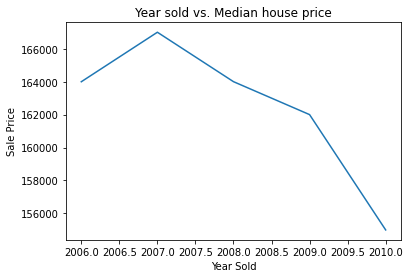

In [25]:
#lets analyze the sales price in relationship with the year sold
data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')
plt.title('Year sold vs. Median house price')
plt.show()

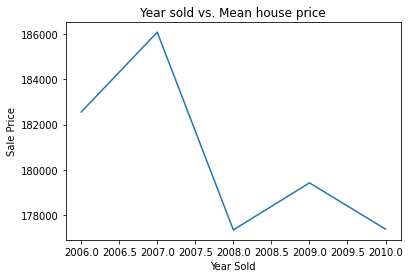

In [26]:
#im curiuos, lets also see how the mean price changed over time 
data.groupby('YrSold')['SalePrice'].mean().plot()
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')
plt.title('Year sold vs. Mean house price')
plt.show()

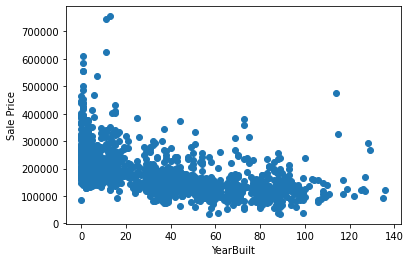

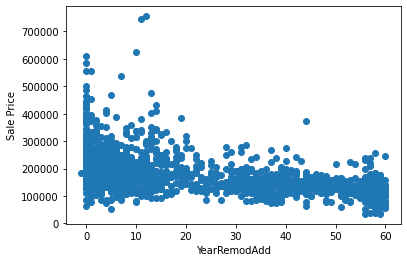

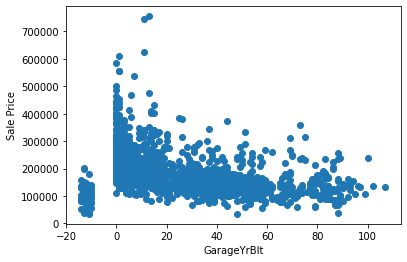

In [27]:
#compare balance year features with sale price
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
                data[feature] = data['YrSold'] - data[feature]
                plt.scatter(data[feature], data['SalePrice'])
                plt.xlabel(feature)
                plt.ylabel("Sale Price")
                plt.show()

In [28]:
#now lets analyze the numerical features further
#split the numerical features into discrete and continous 
discrete_features = [feature for feature in numerical_features if len(data[feature].unique())<25
                    and feature not in year_features]
print('Discrete Features length:', len(discrete_features))
data[discrete_features].head() 

Discrete Features length: 17


,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


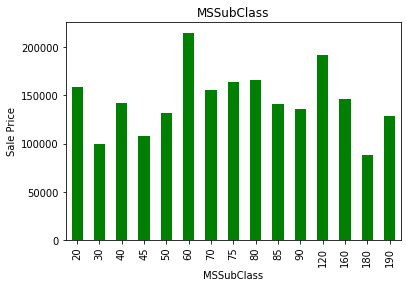

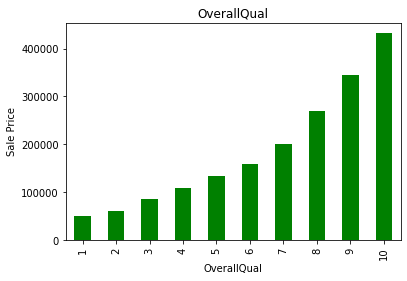

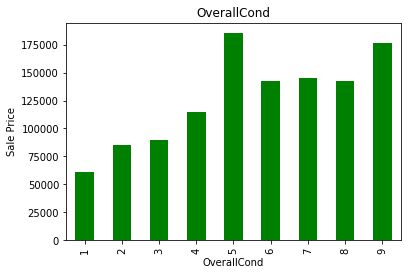

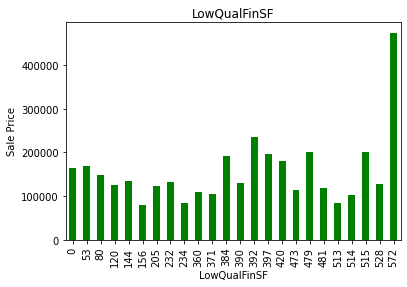

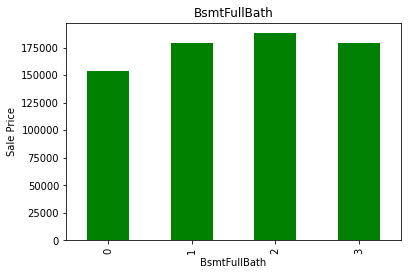

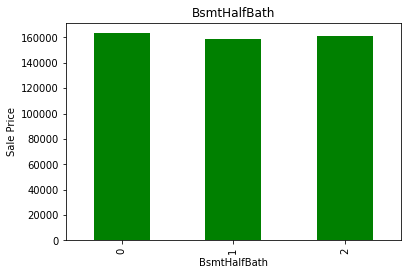

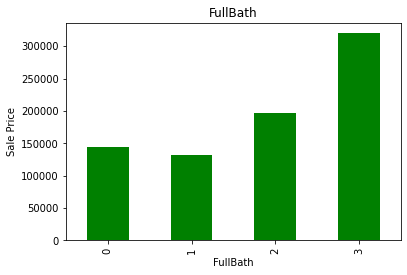

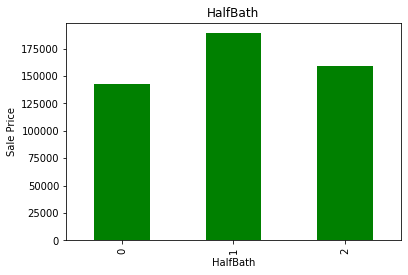

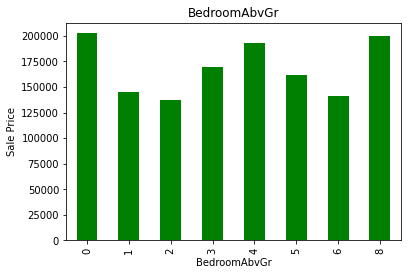

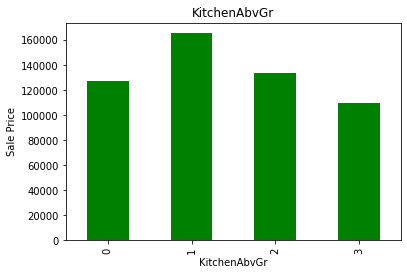

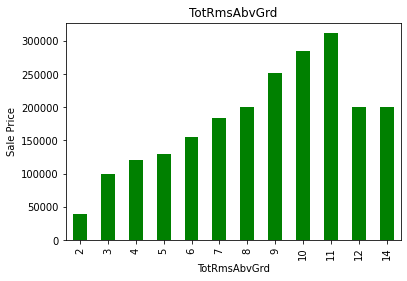

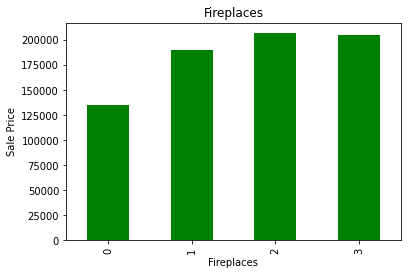

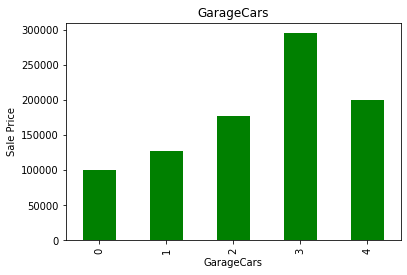

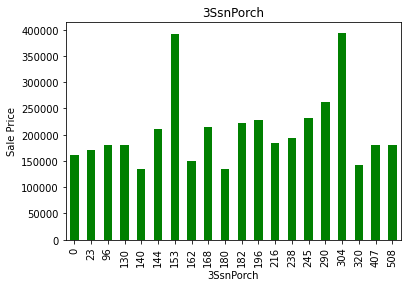

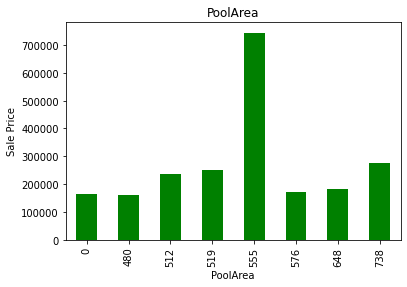

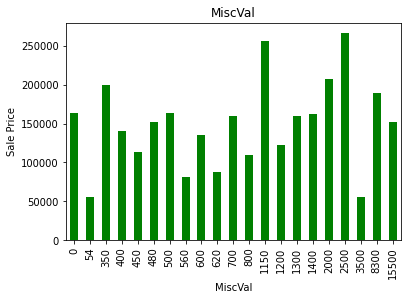

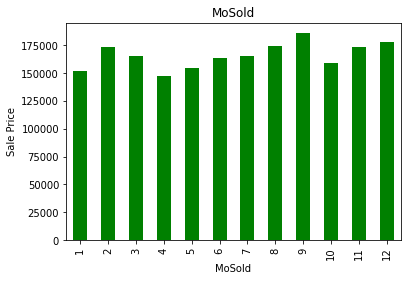

In [29]:
#plot the discrete features against the sale price6
for feature in discrete_features:
    data.groupby(feature)['SalePrice'].median().plot.bar(color='g')
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.title(feature)
    plt.show()

In [30]:
#analyzing continous features
continous_features = [feature for feature in numerical_features if feature not in 
year_features + discrete_features]
print('Continous Features:' , len(continous_features))
data[continous_features].head() 

Continous Features: 17


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,totalSF
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500,2566
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500,2524
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500,2706
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000,2473
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000,3343


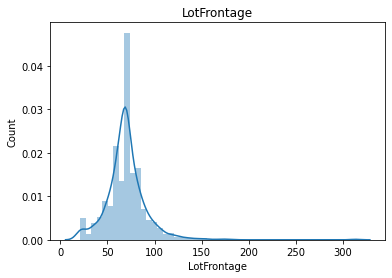

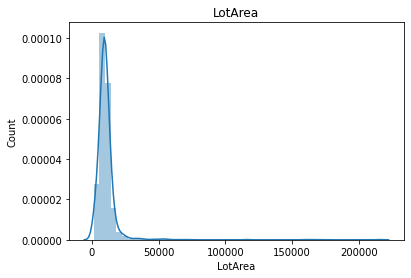

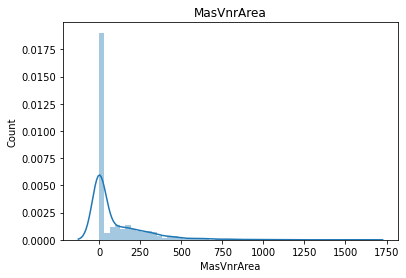

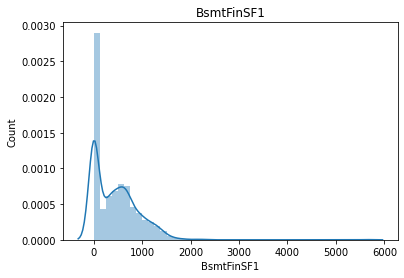

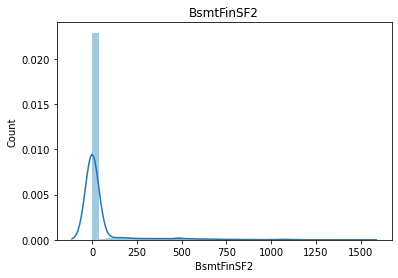

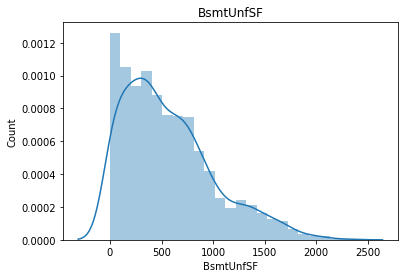

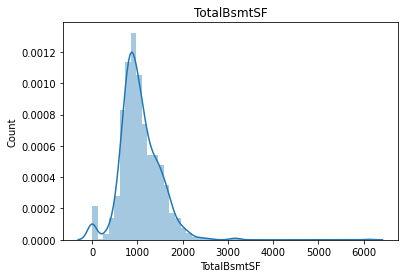

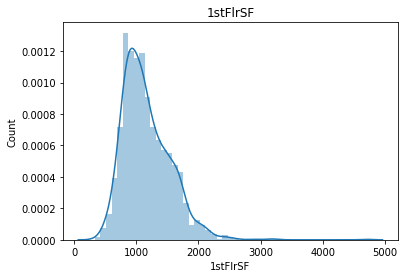

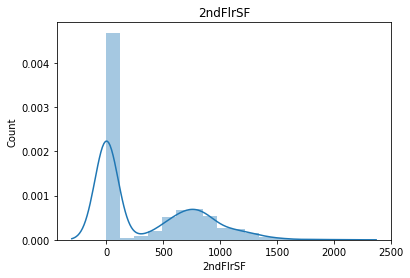

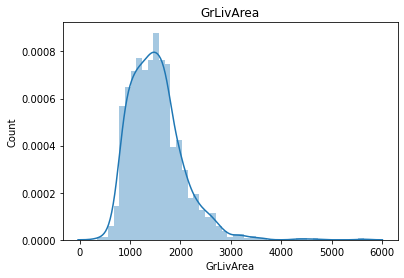

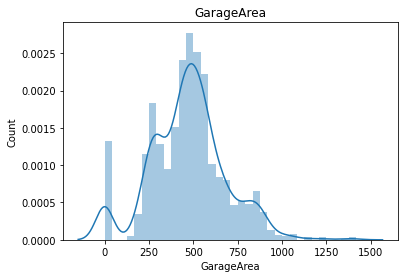

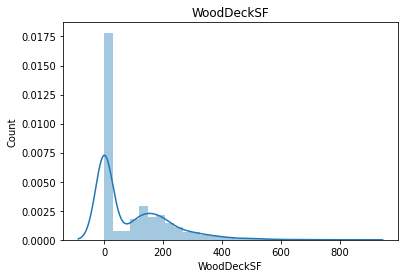

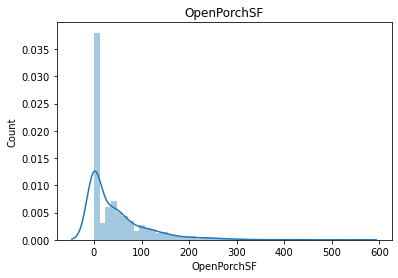

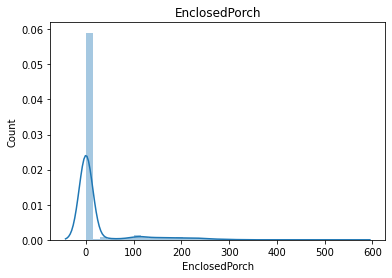

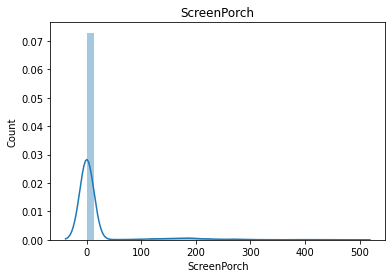

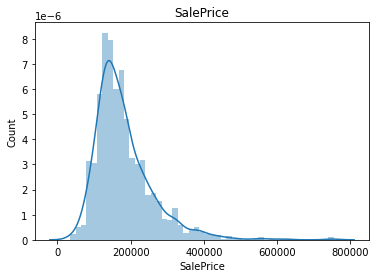

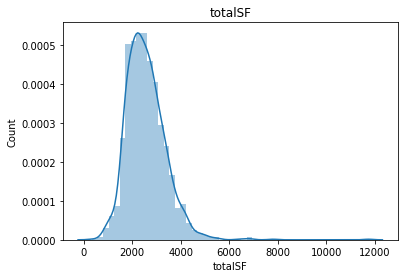

In [31]:
#plot the continous features using distplots
for feature in continous_features:
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [32]:
#log transformation on skewed data 
#lets first get the list of continous features
#on which we can run the log transformation 
#if 0 not in the unique values of the feature
#then we transform it 

#initialize empty list 
log_features = []
for feature in continous_features:
    if 0 not in data[feature].unique():
        log_features.append(feature)
log_features

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice', 'totalSF']

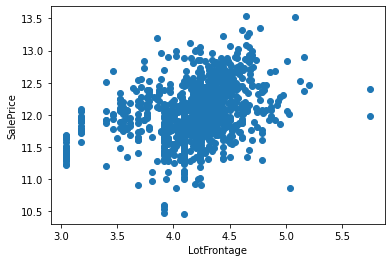

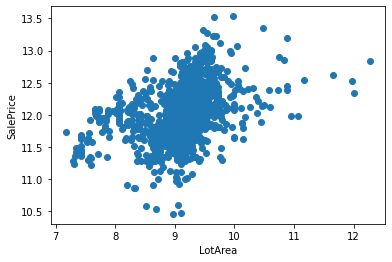

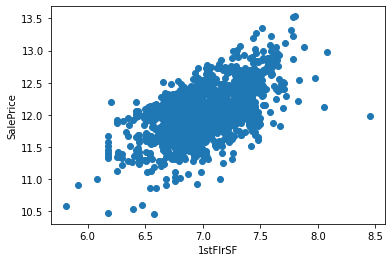

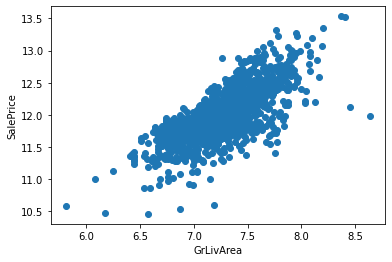

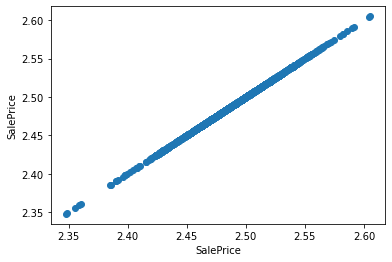

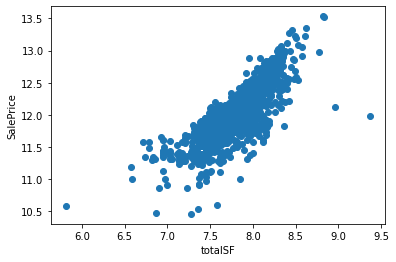

In [33]:
#plot log features 
for feature in log_features:
    datacopy = data.copy()
    datacopy[feature] = np.log(datacopy[feature])
    datacopy['SalePrice']=np.log(datacopy['SalePrice'])
    plt.scatter(datacopy[feature], datacopy['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

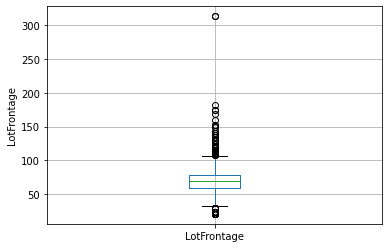

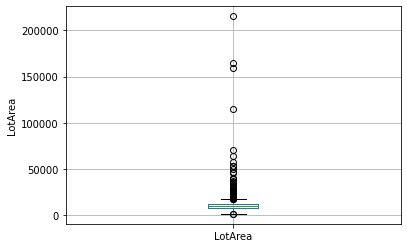

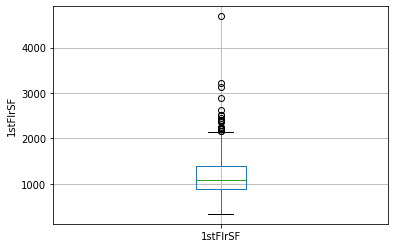

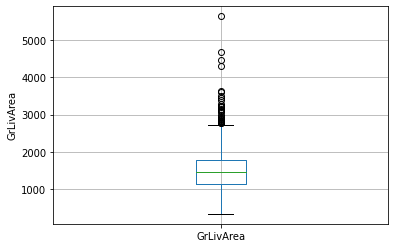

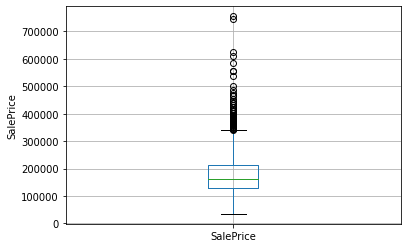

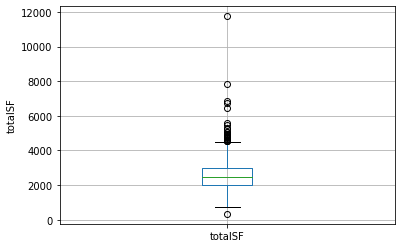

In [34]:
#run some outliers 
for feature in log_features:
    datacopy = data.copy()
    datacopy[feature] = np.log(datacopy[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.show()

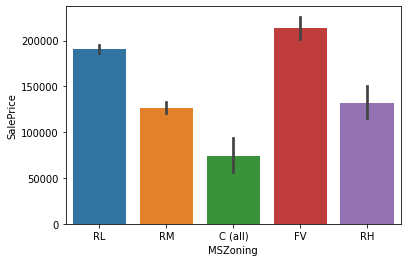

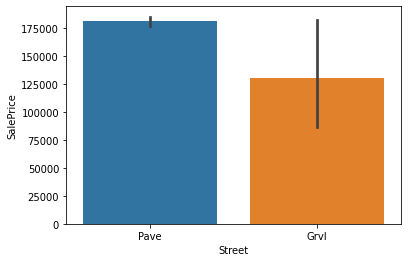

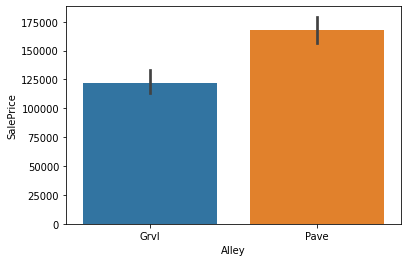

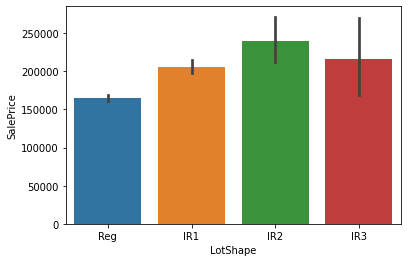

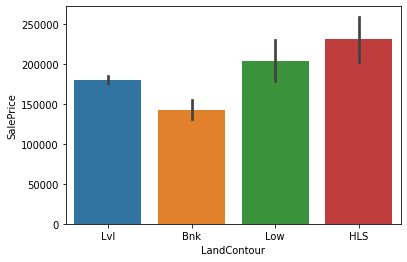

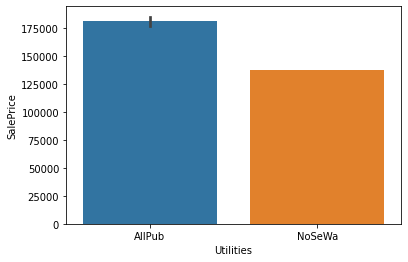

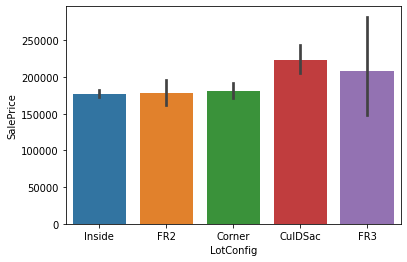

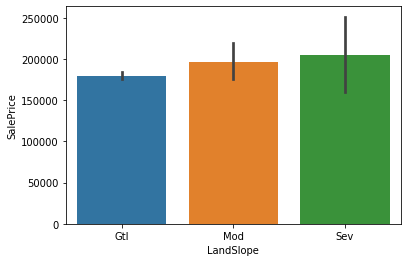

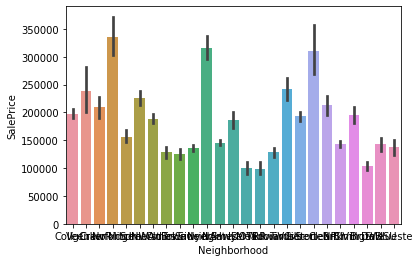

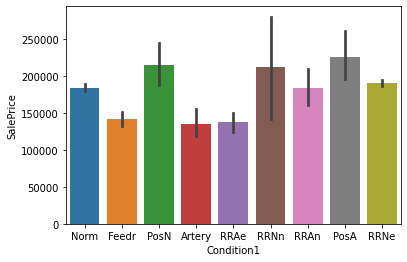

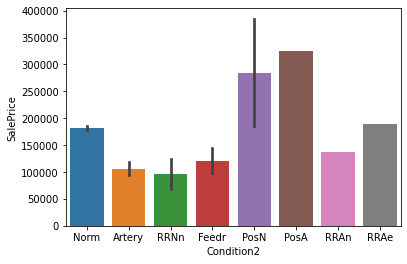

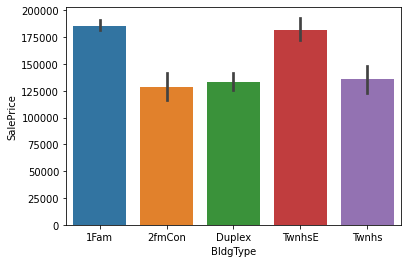

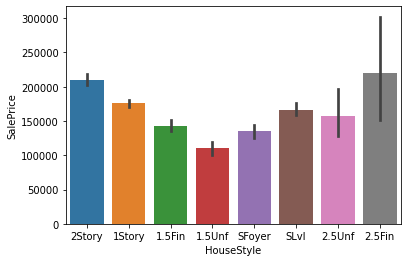

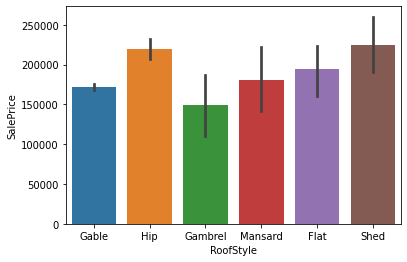

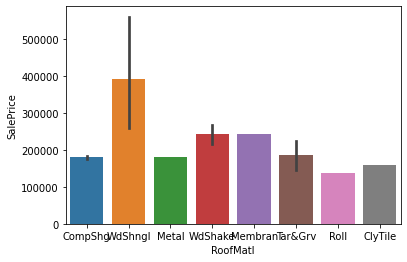

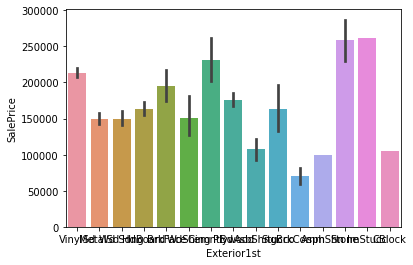

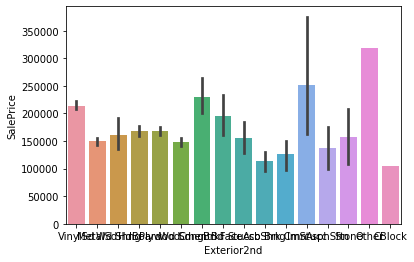

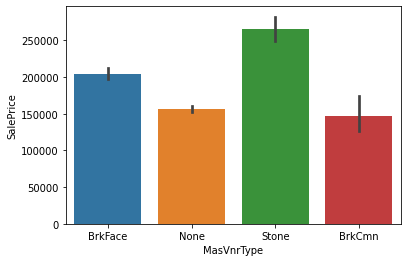

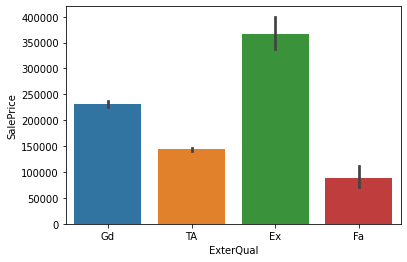

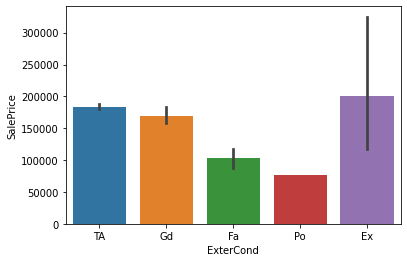

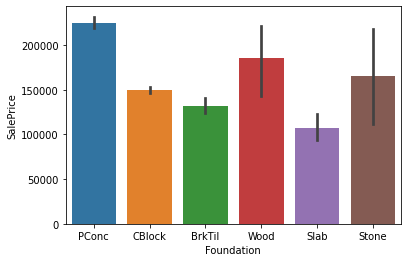

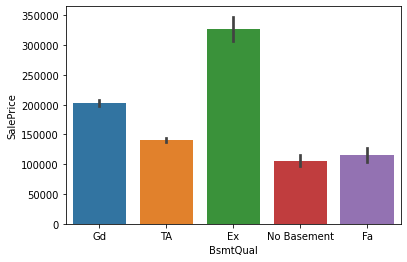

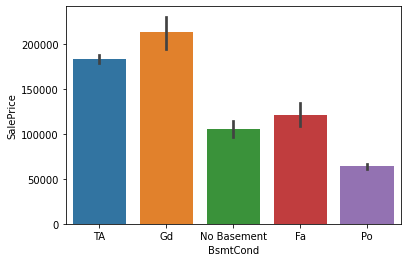

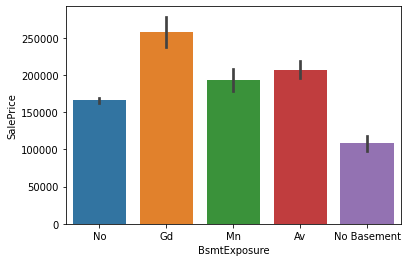

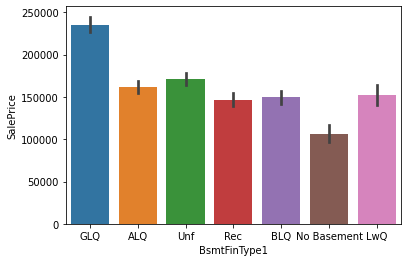

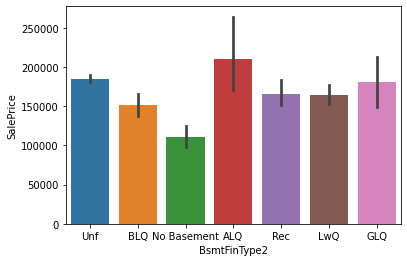

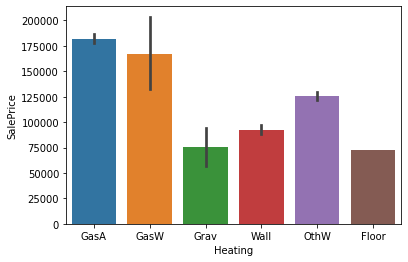

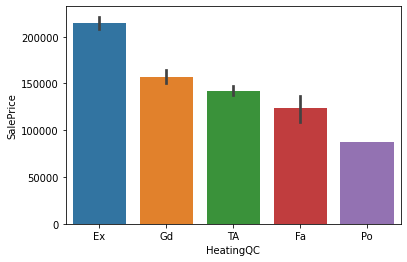

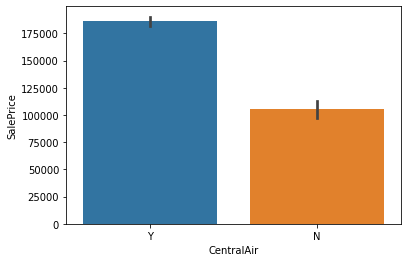

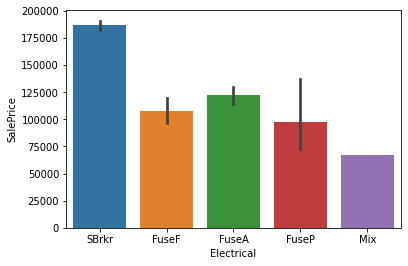

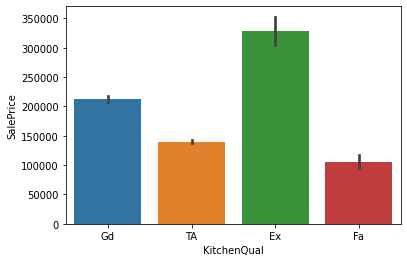

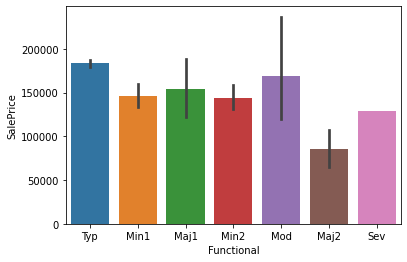

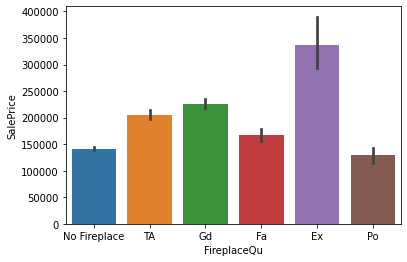

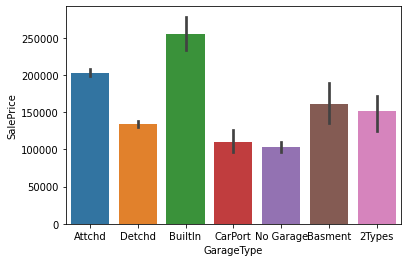

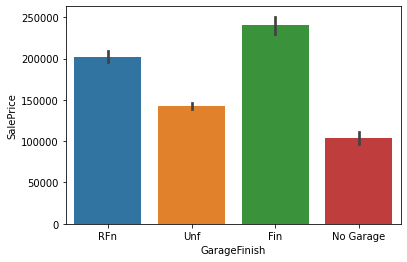

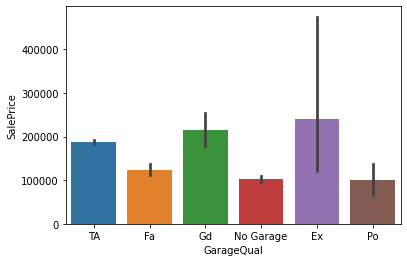

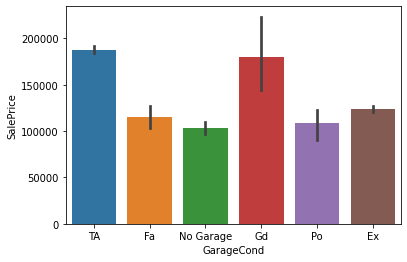

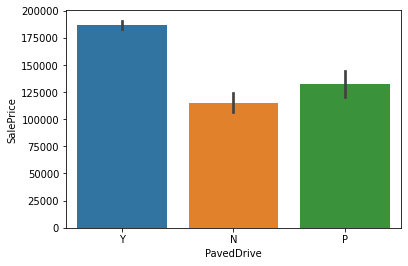

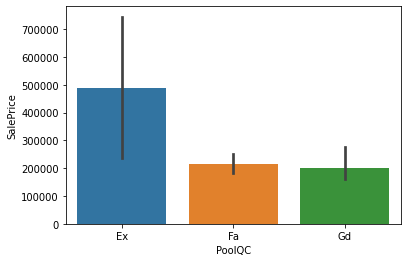

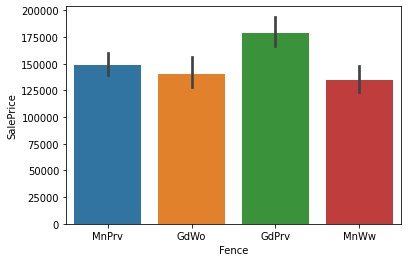

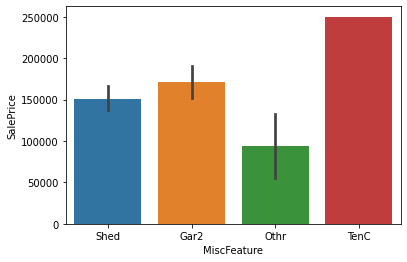

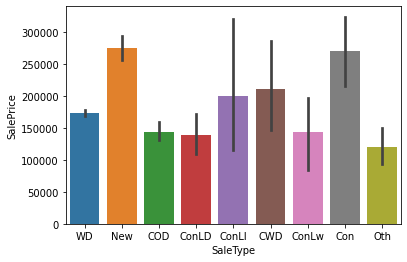

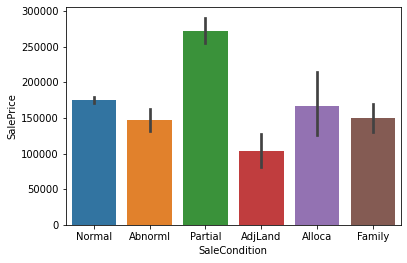

In [35]:
#plot the categorical data against the target variable
#last step of EDA
for feature in categorcial_features:
    datacopy = data.copy()
    sns.barplot(x=feature, y='SalePrice', data=datacopy)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

OUTLIER ANALYSIS AND MORE

In [36]:
#outlier analysis 
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MSSubClass          50.00
LotFrontage         19.00
LotArea           4048.00
OverallQual          2.00
OverallCond          1.00
YearBuilt           46.00
YearRemodAdd        37.00
MasVnrArea         164.25
BsmtFinSF1         712.25
BsmtFinSF2           0.00
BsmtUnfSF          585.00
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
LowQualFinSF         0.00
GrLivArea          647.25
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         42.00
GarageCars           1.00
GarageArea         241.50
WoodDeckSF         168.00
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        84025.00
totalSF            994.50
dtype: float

In [37]:
#drop records outside the IQR range 
data = data[~(((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1))]
print(data.shape)

(557, 81)


In [38]:
#get dummies 
df = pd.get_dummies(data, drop_first=True)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,totalSF,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gambrel,RoofStyle_Hip,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasW,Heating_Grav,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_No Garage,GarageQual_TA,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,5,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,5.0,2,548,0,61,0,0,0,0,0,2,2008,208500,2566,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,60,68.0,11250,7,5,7,6,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,7.0,2,608,0,42,0,0,0,0,0,9,2008,223500,2706,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,60,84.0,14260,8,5,8,8,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,8.0,3,836,192,84,0,0,0,0,0,12,2008,250000,3343,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [39]:
#check new shape
df.shape

(557, 188)

MODEL BUILDING

In [40]:
#Split the data
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [41]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (389, 187)
X_test Shape: (168, 187)
y_train Shape: (389,)
y_test Shape: (168,)


In [42]:
#check X train
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,totalSF,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gambrel,RoofStyle_Hip,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasW,Heating_Grav,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_No Garage,GarageQual_TA,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
781,60,65.0,7153,6,5,14,14,0.0,387,0,374,761,810,793,0,1603,0,0,2,1,3,1,7,0,14.0,2,484,0,124,0,0,0,0,0,7,2006,2364,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1261,20,80.0,9600,5,6,53,53,0.0,504,0,546,1050,1050,0,0,1050,0,0,1,0,2,1,5,0,53.0,1,338,0,0,0,0,0,0,0,6,2009,2100,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1157,120,34.0,5001,7,5,2,1,166.0,904,0,410,1314,1314,0,0,1314,1,0,2,0,2,1,6,1,1.0,2,626,172,62,0,0,0,0,0,7,2009,2628,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [43]:
#check y train
y_train.head()

781     175900
1261    128900
1157    230000
606     152000
853     158000
Name: SalePrice, dtype: int64

BUILDING A LINEAR REGRESSION MODEL

In [44]:
#scaling features
scaler = StandardScaler()
scale_var = X.columns
X[scale_var] = scaler.fit_transform(X[scale_var])

In [45]:
#Building a Linear regression model 
reg = LinearRegression()
reg.fit(X_train, y_train)

# running RFE for 40 features
rfe = RFE(reg, 40)             
rfe = rfe.fit(X_train, y_train)

#check rfe columns
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'FullBath', 'GarageCars', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'BldgType_Duplex',
       'HouseStyle_SLvl', 'RoofStyle_Gambrel', 'Exterior1st_BrkFace',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_Stone',
       'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'Exterior2nd_Wd Shng', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA',
       'BsmtExposure_Gd', 'Heating_Grav', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'GarageQual_No Garage', 'SaleType_CWD',
       'SaleType_Con'],
      dtype='object')

In [46]:
#predict on train 
print('LINEAR REGRESSION')

metric = []

#predict on train
y_train_pred = reg.predict(X_train)
#predict on test
y_test_pred = reg.predict(X_test)

#r2 score on train LR
r2_train_lr =  metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print('R2 Train:', r2_train_lr)
metric.append(r2_train_lr)
                                
#r2 score on test LR
r2_test_lr = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print('R2 test:', r2_test_lr)
metric.append(r2_test_lr)

#RSS score LR on train
rss_train_lr = np.sum(np.square(y_train, y_train_pred))
print('RSS Train:', rss_train_lr)
metric.append(rss_train_lr)

#RSS score LR on test
rss_test_lr = np.sum(np.square(y_test, y_test_pred))
print('RSS Test:', rss_test_lr)
metric.append(rss_test_lr)

#mse on train for LR
mse_train_lr = mean_squared_error(y_train, y_train_pred)
print('MSE Train:', mse_train_lr)
metric.append(mse_train_lr)

#mse on test for LR
mse_test_lr = mean_squared_error(y_test, y_test_pred)
print('MSE Test:',mse_test_lr)
metric.append(mse_test_lr)

LINEAR REGRESSION
R2 Train: 0.96434958313394
R2 test: 0.8842601499937327
RSS Train: 13480746010456.0
RSS Test: 6049980008605.0
MSE Train: 1.6690257781115477e+21
MSE Test: 1.79124500267242e+21


BUILDING A RIDGE MODEL

In [47]:
#ridge regression
#list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#instantiate and object
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.6s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [48]:
#get the best alpha hyperparameter
model_cv.best_params_

{'alpha': 5.0}

In [63]:
#run the ridge model with alpha = 5
alpha = 5
ridge = Ridge(alpha=alpha)
#fit the data
ridge.fit(X_train, y_train)
#predict on the data
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
#get intercept
print('Ridge Intercept:', ridge.intercept_)

Ridge Intercept: -304547.73897655134


In [64]:
#r2 score for ridge on train and test for alpha = 5
print("RIDGE")

metric2 = []
#ridge train r2
r2_train_ridge = r2_score(y_train,y_pred_train)
print('R2 Train:', r2_train_ridge)
metric2.append(r2_train_ridge)

#ridge test r2
r2_test_ridge = r2_score(y_test,y_pred_test)
print('R2 Test:', r2_test_ridge)
metric2.append(r2_test_ridge)

#rss ridge on train data
rss_train_ridge = np.sum(np.square(y_train-y_pred_train))
print('RSS train:', rss_train_ridge)
metric2.append(rss_train_ridge)

#rss ridge on train data
rss_test_ridge = np.sum(np.square(y_test-y_pred_test))
print('RSS Test:', rss_test_ridge)
metric2.append(rss_test_ridge)

#mse on train - ridge
mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print('MSE train:', mse_train_ridge)
metric2.append(mse_train_ridge**0.5)

#mse on test - ridge
mse_test_ridge = mean_squared_error(y_test, y_pred_test)
print('MSE test:',mse_test_ridge)
metric2.append(mse_test_ridge**0.5)

RIDGE
R2 Train: 0.94791042635026
R2 Test: 0.9236144041045468
RSS train: 61615959638.905304
RSS Test: 39246840299.62378
MSE train: 158395783.13343266
MSE test: 233612144.64061773


BUILDING A LASSO MODEL

In [65]:
#Lasso
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]}

#instantiate an object
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   12.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200]},
             return_train_score=True, scoring='r2', verbose=1)

In [66]:
model_cv.best_params_

{'alpha': 100}

In [67]:
#run the lasso model with alpha = 100
alpha = 100
lasso = Lasso(alpha=alpha)
#fit the data
lasso.fit(X_train, y_train)
#predict on the data
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)
#get intercept
print('Lasso Intercept:', lasso.intercept_)

Lasso Intercept: -297204.1334956483


In [68]:
#r2 score for lasso on train and test for alpha = 100
print("LASSO")

metric3 = []
#ridge train r2
r2_train_lasso = r2_score(y_train,y_pred_train)
print('R2 Train:', r2_train_lasso)
metric3.append(r2_train_lasso)

#ridge test r2
r2_test_lasso = r2_score(y_test,y_pred_test)
print('R2 Test:', r2_test_lasso)
metric3.append(r2_test_lasso)

#rss ridge on train data
rss_train_lasso = np.sum(np.square(y_train-y_pred_train))
print('RSS Train:', rss_train_lasso)
metric3.append(rss_train_lasso)

#rss ridge on train data
rss_test_lasso = np.sum(np.square(y_test-y_pred_test))
print('RSS Test:', rss_test_lasso)
metric3.append(rss_test_lasso)

#mse on train - ridge
mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print('MSE Train:', mse_train_lasso)
metric3.append(mse_train_lasso**0.5)

#mse on test - ridge
mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print('MSE Test:', mse_test_lasso)
metric3.append(mse_train_lasso**0.5)

LASSO
R2 Train: 0.9434197230652316
R2 Test: 0.9225112359575551
RSS Train: 66927943841.7554
RSS Test: 39813646954.47887
MSE Train: 172051269.51608074
MSE Test: 236985993.7766599


MODEL EVALUATION

In [69]:
#concatenate all metric lists into one df
#create table
lr_table = {'Metric': ['R2 Score (Train)', 'R2 Score (Test)', 'RSS (Train)', 'RSS (Test)' , 'MSE (Train)', 'MSE (Test)'],
            'Linear Regression': metric}
#get metrics for all models
lr_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Linear Regression'])
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

#concatenate
final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis=1)
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.643496e-01,9.479104e-01,9.434197e-01
1,R2 Score (Test),8.842601e-01,9.236144e-01,9.225112e-01
2,RSS (Train),1.348075e+13,6.161596e+10,6.692794e+10
3,RSS (Test),6.049980e+12,3.924684e+10,3.981365e+10
4,MSE (Train),1.669026e+21,1.258554e+04,1.311683e+04
5,MSE (Test),1.791245e+21,1.528438e+04,1.311683e+04


In [70]:
#comparing model coefficients 
#create df
betas = pd.DataFrame(index=X.columns)
#get rows 
betas.rows = X.columns
#create series
betas['Linear'] = reg.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

betas.head(40)

,Linear,Ridge,Lasso
MSSubClass,-5.239736e+02,-54.919459,-12.784749
LotFrontage,7.833152e+01,55.048262,70.390243
LotArea,1.074726e-01,0.559896,0.586263
OverallQual,2.241971e+03,6930.707160,6978.021285
OverallCond,6.663597e+03,6436.451795,6892.194192
YearBuilt,-2.384848e+02,-324.442096,-312.313391
YearRemodAdd,-6.520123e+01,-144.680567,-143.904353
MasVnrArea,5.495999e+00,10.164424,7.136873
BsmtFinSF1,1.491734e+01,11.710241,31.999220
BsmtFinSF2,-2.216184e-07,0.000000,0.000000


THEORY QUESTIONS

In [72]:
#Ridge
#run the ridge model with alpha = 10
alpha = 10
ridge = Ridge(alpha=alpha)
#fit the data
ridge.fit(X_train, y_train)
#predict on the data
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
#get intercept
print('Ridge Intercept:', ridge.intercept_)


Ridge Intercept: -413604.57610337075


In [73]:
r2_train_ridge = r2_score(y_train,y_pred_train)
print('R2 Train:', r2_train_ridge)
r2_test_ridge = r2_score(y_test,y_pred_test)
print('R2 Test:', r2_test_ridge)
rss_train_ridge = np.sum(np.square(y_train-y_pred_train))
print('RSS train:', rss_train_ridge)
metric2.append(rss_train_ridge)
rss_test_ridge = np.sum(np.square(y_test-y_pred_test))
print('RSS Test:', rss_test_ridge)
metric2.append(rss_test_ridge)
mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print('MSE train:', mse_train_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test)
print('MSE test:',mse_test_ridge)

R2 Train: 0.9413855371063011
R2 Test: 0.9245370172671937
RSS train: 69334151287.15091
RSS Test: 38772802609.29413
MSE train: 178236892.76902547
MSE test: 230790491.72198886


In [74]:
#run the lasso model with alpha = 200
alpha = 20
lasso = Lasso(alpha=alpha)
#fit the data
lasso.fit(X_train, y_train)
#predict on the data
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)
#get intercept
print('Lasso Intercept:', lasso.intercept_)

Lasso Intercept: -283052.10845294


In [75]:
r2_train_lasso = r2_score(y_train,y_pred_train)
print('R2 Train:', r2_train_lasso)
r2_test_lasso = r2_score(y_test,y_pred_test)
print('R2 Test:', r2_test_lasso)
rss_train_lasso = np.sum(np.square(y_train-y_pred_train))
print('RSS Train:', rss_train_lasso)
rss_test_lasso = np.sum(np.square(y_test-y_pred_test))
print('RSS Test:', rss_test_lasso)
mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print('MSE Train:', mse_train_lasso)

R2 Train: 0.9591549779327774
R2 Test: 0.915078237375976
RSS Train: 48314951626.73022
RSS Test: 43632713950.798874
MSE Train: 124202960.48002626


In [76]:
#comparing model coefficients of doubled lambda values
#create df
betas = pd.DataFrame(index=X.columns)
#get rows 
betas.rows = X.columns
#create series
betas['Linear'] = reg.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

betas.head(40)

,Linear,Ridge,Lasso
MSSubClass,-5.239736e+02,-37.701328,-119.081285
LotFrontage,7.833152e+01,63.453821,50.035278
LotArea,1.074726e-01,0.583047,0.406773
OverallQual,2.241971e+03,7572.568315,4414.667754
OverallCond,6.663597e+03,6514.037540,6694.894330
YearBuilt,-2.384848e+02,-328.955935,-329.807059
YearRemodAdd,-6.520123e+01,-148.523665,-58.405214
MasVnrArea,5.495999e+00,11.507440,9.121844
BsmtFinSF1,1.491734e+01,12.005299,31.248996
BsmtFinSF2,-2.216184e-07,0.000000,0.000000


THE END